In [1]:
import pandas as pd

df=pd.read_csv('/content/drive/MyDrive/toy_dataset.csv')
df.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [2]:
df=pd.get_dummies(df,drop_first=True)
df.drop('Number',axis=1,inplace=True)
df


,Age,Income,City_Boston,City_Dallas,City_Los Angeles,City_Mountain View,City_New York City,City_San Diego,City_Washington D.C.,Gender_Male,Illness_Yes
0,41,40367.0,0,1,0,0,0,0,0,1,0
1,54,45084.0,0,1,0,0,0,0,0,1,0
2,42,52483.0,0,1,0,0,0,0,0,1,0
3,40,40941.0,0,1,0,0,0,0,0,1,0
4,46,50289.0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
149995,48,93669.0,0,0,0,0,0,0,0,1,0
149996,25,96748.0,0,0,0,0,0,0,0,1,0
149997,26,111885.0,0,0,0,0,0,0,0,1,0
149998,25,111878.0,0,0,0,0,0,0,0,1,0


In [3]:
import pandas as pd

# Assuming df is your DataFrame and 'illness' is the name of the qualitative column
# Assuming you want 5000 samples for each category ('yes' and 'no')

# Separate the DataFrame into two subsets based on the value of the 'illness' column
illness_yes = df[df['Illness_Yes'] == 1]
illness_no = df[df['Illness_Yes'] == 0]

# Sample from each subset to get the desired number of samples
sampled_yes = illness_yes.sample(n=min(5000, len(illness_yes)), replace=False)
sampled_no = illness_no.sample(n=min(5000, len(illness_no)), replace=False)

# Concatenate the sampled subsets into a single DataFrame
sampled_data = pd.concat([sampled_yes, sampled_no])

# Shuffle the DataFrame to randomize the order of samples
df = sampled_data.sample(frac=1).reset_index(drop=True)

# Display the sampled data
print(df)


      Age    Income  City_Boston  City_Dallas  City_Los Angeles  \
0      27   94714.0            0            0                 0   
1      28  141206.0            0            0                 0   
2      56  104913.0            0            0                 0   
3      33  102168.0            0            0                 0   
4      42  103543.0            0            0                 1   
...   ...       ...          ...          ...               ...   
9995   57   89705.0            0            0                 0   
9996   65   89856.0            0            0                 0   
9997   58   57338.0            0            1                 0   
9998   39  109733.0            0            0                 0   
9999   33   37345.0            0            1                 0   

      City_Mountain View  City_New York City  City_San Diego  \
0                      0                   0               0   
1                      1                   0               0   
2  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   10000 non-null  int64  
 1   Income                10000 non-null  float64
 2   City_Boston           10000 non-null  uint8  
 3   City_Dallas           10000 non-null  uint8  
 4   City_Los Angeles      10000 non-null  uint8  
 5   City_Mountain View    10000 non-null  uint8  
 6   City_New York City    10000 non-null  uint8  
 7   City_San Diego        10000 non-null  uint8  
 8   City_Washington D.C.  10000 non-null  uint8  
 9   Gender_Male           10000 non-null  uint8  
 10  Illness_Yes           10000 non-null  uint8  
dtypes: float64(1), int64(1), uint8(9)
memory usage: 244.3 KB


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


numeric_columns = df.drop('Illness_Yes',axis=1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
scaled_data = scaler.fit_transform(numeric_columns)

# Create a DataFrame from the scaled data
x = pd.DataFrame(scaled_data, columns=numeric_columns.columns)

# Display the DataFrame
print(x.head())
df=pd.concat([x,df['Illness_Yes']],axis=1)
df

        Age    Income  City_Boston  City_Dallas  City_Los Angeles  \
0 -1.530268  0.141165      -0.2431    -0.393024         -0.510759   
1 -1.444388  1.985829      -0.2431    -0.393024         -0.510759   
2  0.960249  0.545831      -0.2431    -0.393024         -0.510759   
3 -1.014989  0.436917      -0.2431    -0.393024         -0.510759   
4 -0.242070  0.491473      -0.2431    -0.393024          1.957869   

   City_Mountain View  City_New York City  City_San Diego  \
0           -0.328871           -0.709442       -0.182111   
1            3.040707           -0.709442       -0.182111   
2           -0.328871            1.409559       -0.182111   
3           -0.328871            1.409559       -0.182111   
4           -0.328871           -0.709442       -0.182111   

   City_Washington D.C.  Gender_Male  
0             -0.246314    -1.119721  
1             -0.246314    -1.119721  
2             -0.246314     0.893080  
3             -0.246314     0.893080  
4             -0.246314

,Age,Income,City_Boston,City_Dallas,City_Los Angeles,City_Mountain View,City_New York City,City_San Diego,City_Washington D.C.,Gender_Male,Illness_Yes
0,-1.530268,0.141165,-0.2431,-0.393024,-0.510759,-0.328871,-0.709442,-0.182111,-0.246314,-1.119721,1
1,-1.444388,1.985829,-0.2431,-0.393024,-0.510759,3.040707,-0.709442,-0.182111,-0.246314,-1.119721,0
2,0.960249,0.545831,-0.2431,-0.393024,-0.510759,-0.328871,1.409559,-0.182111,-0.246314,0.893080,1
3,-1.014989,0.436917,-0.2431,-0.393024,-0.510759,-0.328871,1.409559,-0.182111,-0.246314,0.893080,1
4,-0.242070,0.491473,-0.2431,-0.393024,1.957869,-0.328871,-0.709442,-0.182111,-0.246314,0.893080,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.046129,-0.057578,-0.2431,-0.393024,-0.510759,-0.328871,-0.709442,-0.182111,-0.246314,-1.119721,1
9996,1.733168,-0.051586,-0.2431,-0.393024,-0.510759,-0.328871,1.409559,-0.182111,-0.246314,-1.119721,0
9997,1.132009,-1.341804,-0.2431,2.544374,-0.510759,-0.328871,-0.709442,-0.182111,-0.246314,0.893080,1
9998,-0.499709,0.737074,-0.2431,-0.393024,-0.510759,-0.328871,1.409559,-0.182111,-0.246314,0.893080,0


In [6]:
import pandas as pd
import random
def unlabel_data(df, percentage_to_unlabel):
  num_to_unlabel = int(len(df) * percentage_to_unlabel)
  indices_to_unlabel = random.sample(range(len(df)), num_to_unlabel)
  df.loc[indices_to_unlabel, 'Illness_Yes'] = None # Replace with your label column name
  return df
# Unlabel 70% of the data
df1 = unlabel_data(df.copy(), 0.7)
x=df1.drop('Illness_Yes',axis=1)


In [7]:
from sklearn.cluster import KMeans
import numpy as np
# Assuming you have data X and you've already fit KMeans model
kmeans = KMeans(n_clusters=14)
clusters=kmeans.fit_predict(x)
from scipy.spatial.distance import cdist
# Get centroids
centroids = kmeans.cluster_centers_
# Find indices of closest points to centroids
distances = cdist(x, centroids, metric='euclidean')
closest_point_indices = np.argmin(distances, axis=0)
# Get the centroids of each cluster
X1 =x.iloc[closest_point_indices,:]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


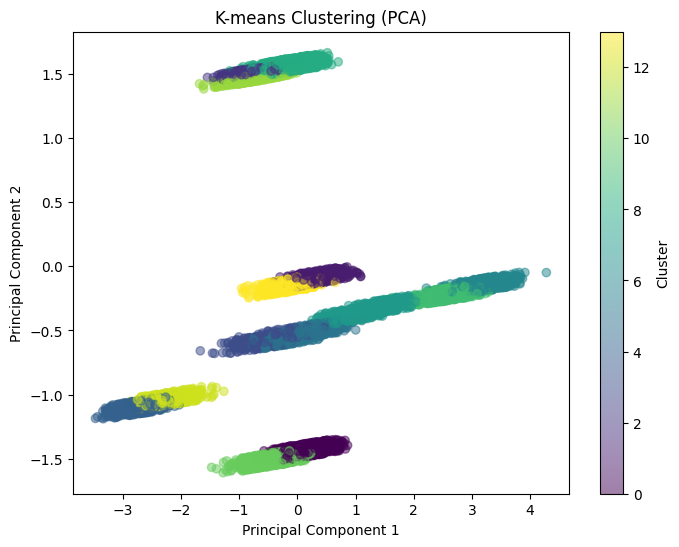

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

# Plot clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('K-means Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [9]:
y=df1.iloc[:,-1]
y1=y[closest_point_indices]

In [10]:
kmeans = KMeans(n_clusters=14)
kmeans.fit(x)
centroids = kmeans.cluster_centers_
# Find indices of closest points to centroids
distances = cdist(x, centroids, metric='euclidean')
closest_point_indices = np.argmin(distances, axis=0)
# Get the centroids of each cluster
X2 = x.iloc[closest_point_indices,:]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
y2=y[closest_point_indices]

In [12]:
import numpy as np
import multiprocessing

def compute_distance(i, data1, data2):
    distances = np.zeros(data2.shape[0], dtype=np.float32)
    for j in range(data2.shape[0]):
        distances[j] = np.exp(-0.5*np.linalg.norm(data1.iloc[i] - data2.iloc[j])**2)
    return distances

def distance_matrix_parallel(data1, data2):
    num_samples1 = data1.shape[0]
    num_samples2 = data2.shape[0]
    num_processes = multiprocessing.cpu_count()
    pool = multiprocessing.Pool(processes=num_processes)
    results = [pool.apply_async(compute_distance, args=(i, data1, data2)) for i in range(num_samples1)]
    distance_matrix = np.array([result.get() for result in results])
    return distance_matrix

# Assuming X1 is your first dataset and X2 is your second dataset
W = distance_matrix_parallel(X1, X1)


In [13]:
W1=distance_matrix_parallel(x,X1)
K = np.dot(np.dot(W1, np.linalg.inv(W)), W1.T)
row_sums = np.sum(K, axis=1)
# Create a diagonal matrix D with row_sums as diagonal elements
D = np.diag(row_sums)

In [20]:
S = D-K
H=distance_matrix_parallel(x,X1)
# Filter rows with non-null values in the first column
dfl = df1.loc[pd.notnull(df1.iloc[:, -1])]
# Filter rows with null values in the first column
dfu = df1.loc[pd.isnull(df1.iloc[:, -1])]
xl=dfl.drop('Illness_Yes',axis=1)
xu=dfu.drop('Illness_Yes',axis=1)
Hl=distance_matrix_parallel(xl,X1)

In [21]:
Hu=distance_matrix_parallel(xu,X1)
x3=dfl.drop('Illness_Yes',axis=1)

In [16]:
W1l=distance_matrix_parallel(x3,X1)

In [17]:
def response_matrix(data):
  num_samples=len(data)
  response_matrix = np.zeros((num_samples, 2), dtype=np.float32)
  for i in range(num_samples):
    if data.iloc[i]==0:
      response_matrix[i, 0] = 1
      response_matrix[i,1]=0
    elif data.iloc[i]==1:
      response_matrix[i, 0] = 0
      response_matrix[i,1]=1
    return response_matrix
yl=dfl.iloc[:,-1]
Yl= response_matrix(yl)


In [22]:
import numpy as np
M1 = np.dot(np.dot(H.T, S), H)+ 100000* np.dot(Hl.T, Hl) + 0* np.dot(Hu.T, Hu)
M2 = np.linalg.inv(M1)
M3 = np.dot(W1l.T, Yl)
# Step 2: Compute final result
fv = np.dot(M2, M3)
f=np.dot(H,fv)

In [23]:
y_pred=[]
for i in range(10000):
  if f[i,0]>f[i,1]:
    y_pred.append(0)
  else:
    y_pred.append(1)
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(df.iloc[:,-1],y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[2451 2549]
 [2497 2503]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


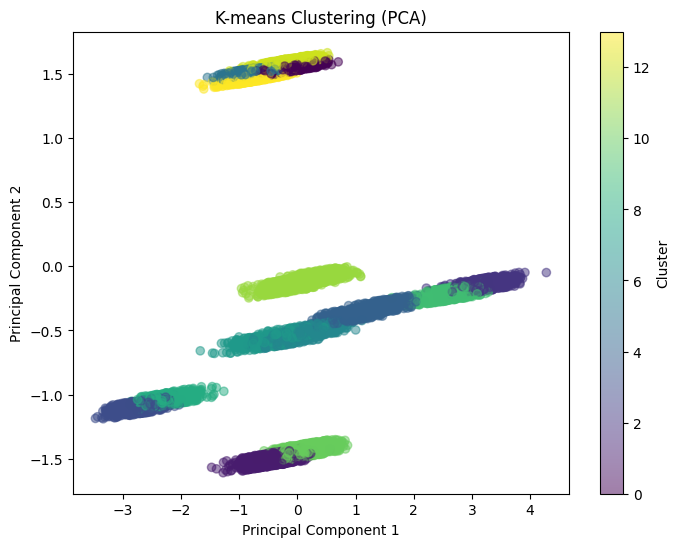

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


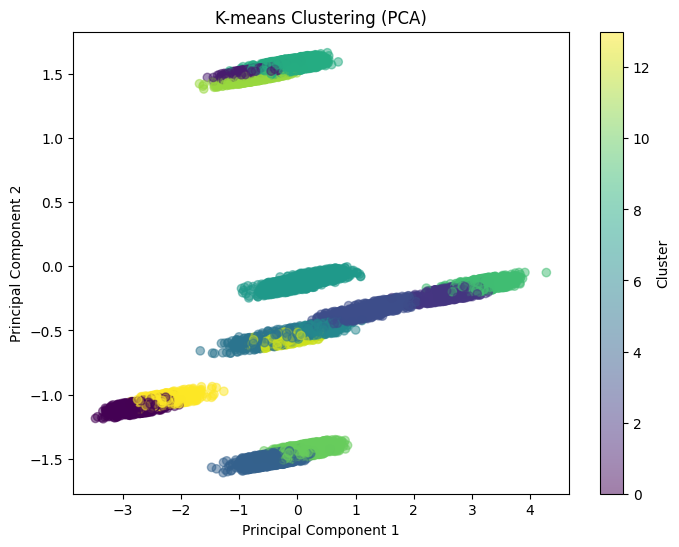

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


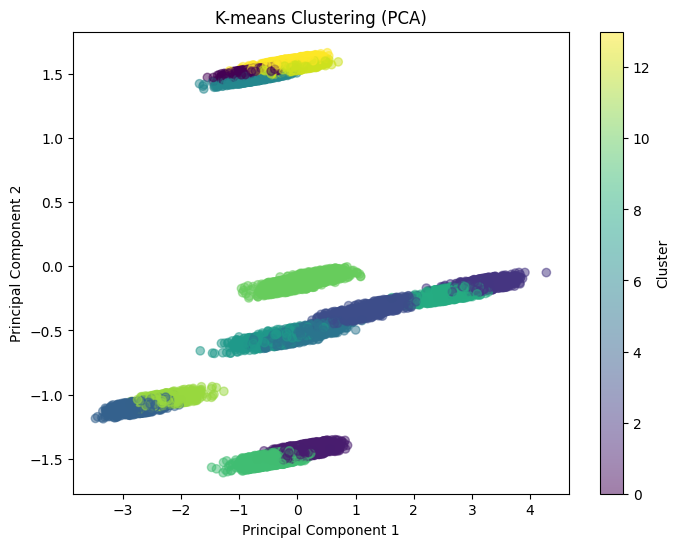

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import multiprocessing

def compute_distance(i, data1, data2):
    distances = np.zeros(data2.shape[0], dtype=np.float32)
    for j in range(data2.shape[0]):
        distances[j] = np.exp(-0.5*np.linalg.norm(data1.iloc[i] - data2.iloc[j])**2)
    return distances

def distance_matrix_parallel(data1, data2):
    num_samples1 = data1.shape[0]
    num_samples2 = data2.shape[0]
    num_processes = multiprocessing.cpu_count()
    pool = multiprocessing.Pool(processes=num_processes)
    results = [pool.apply_async(compute_distance, args=(i, data1, data2)) for i in range(num_samples1)]
    distance_matrix = np.array([result.get() for result in results])
    return distance_matrix
def response_matrix(data):
  num_samples=len(data)
  response_matrix = np.zeros((num_samples, 2), dtype=np.float32)
  for i in range(num_samples):
    if data.iloc[i]==0:
      response_matrix[i, 0] = 1
      response_matrix[i,1]=0
    elif data.iloc[i]==1:
      response_matrix[i, 0] = 0
      response_matrix[i,1]=1
    return response_matrix
f= np.zeros((10000, 2), dtype=np.float32)
for i in range(3):
  kmeans = KMeans(n_clusters=14)
  clusters=kmeans.fit_predict(x)
  from scipy.spatial.distance import cdist
  # Get centroids
  centroids = kmeans.cluster_centers_
  # Find indices of closest points to centroids
  distances = cdist(x, centroids, metric='euclidean')
  closest_point_indices = np.argmin(distances, axis=0)
  # Get the centroids of each cluster
  X1 =x.iloc[closest_point_indices,:]
  # Reduce dimensionality using PCA
  pca = PCA(n_components=2)
  X_pca = pca.fit_transform(x)

  # Plot clusters in 2D
  plt.figure(figsize=(8, 6))
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
  plt.title('K-means Clustering (PCA)')
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  plt.colorbar(label='Cluster')
  plt.show()
  y=df1.iloc[:,-1]
  y1=y[closest_point_indices]
  kmeans = KMeans(n_clusters=14)
  kmeans.fit(x)
  centroids = kmeans.cluster_centers_
  # Find indices of closest points to centroids
  distances = cdist(x, centroids, metric='euclidean')
  closest_point_indices = np.argmin(distances, axis=0)
  # Get the centroids of each cluster
  X2 = x.iloc[closest_point_indices,:]
  y2=y[closest_point_indices]
  W = distance_matrix_parallel(X1, X1)
  W1=distance_matrix_parallel(x,X1)
  K = np.dot(np.dot(W1, np.linalg.inv(W)), W1.T)
  row_sums = np.sum(K, axis=1)
  # Create a diagonal matrix D with row_sums as diagonal elements
  D = np.diag(row_sums)
  S = D-K
  H=distance_matrix_parallel(x,X1)
  # Filter rows with non-null values in the first column
  dfl = df1.loc[pd.notnull(df1.iloc[:, -1])]
  # Filter rows with null values in the first column
  dfu = df1.loc[pd.isnull(df1.iloc[:, -1])]
  xl=dfl.drop('Illness_Yes',axis=1)
  xu=dfu.drop('Illness_Yes',axis=1)
  Hl=distance_matrix_parallel(xl,X1)
  Hu=distance_matrix_parallel(xu,X1)
  x3=dfl.drop('Illness_Yes',axis=1)
  W1l=distance_matrix_parallel(x3,X1)
  yl=dfl.iloc[:,-1]
  Yl= response_matrix(yl)
  M1 = np.dot(np.dot(H.T, S), H)+ 100000* np.dot(Hl.T, Hl) + 0* np.dot(Hu.T, Hu)
  M2 = np.linalg.inv(M1)
  M3 = np.dot(W1l.T, Yl)
  # Step 2: Compute final result
  fv = np.dot(M2, M3)
  f+=np.dot(H,fv)

In [26]:
y_pred=[]
for i in range(10000):
  if f[i,0]>=f[i,1]:
    y_pred.append(0)
  else:
    y_pred.append(1)

In [27]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(df.iloc[:,-1],y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[2195 2805]
 [2205 2795]]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')